In [12]:
from Univariate import Univariate

In [7]:
import pandas as pd 
df=pd.read_csv("preplacementdata.csv")
dataset=pd.read_csv("Placement.csv")
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [10]:
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [9]:
#2)How many of them are not placed?
dataset.isnull().sum()



sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [21]:
#3)Find the reason for non placement from the dataset?
quan,qual=Univariate.QuanQual(dataset)
dataset[quan].mean()


sl_no          108.000000
ssc_p           67.303395
hsc_p           66.333163
degree_p        66.370186
etest_p         72.100558
mba_p           62.278186
salary      288655.405405
dtype: float64

In [36]:
#4)What kind of relation between salary and mba_p
df.select_dtypes(include='number')[['mba_p', 'salary']].corr()
# High positive MBA score strongly affects salary
# Low Weak or no impact

,mba_p,salary
mba_p,1.000000,0.139823
salary,0.139823,1.000000


In [37]:
#5)Which specialization is getting minimum salary
dataset[quan].min()

sl_no            1.00
ssc_p           40.89
hsc_p           37.00
degree_p        50.00
etest_p         50.00
mba_p           51.21
salary      200000.00
dtype: float64

In [57]:
#How many of them getting above 500000 salary?
count = (dataset['salary'] > 500000).sum()
print("Number of salaries above 5,00,000:",count)


Number of salaries above 5,00,000: 3


In [71]:
# 7)Test the Analysis of Variance between etest_p and mba_p at signifance
# level 5%.(Make decision using Hypothesis Testing)
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(df['etest_p'], df['mba_p'])
print(f_stat)
print(p_value)
# from scipy.stats import f_oneway
# f_stat, p_value = f_oneway(df['etest_p'], df['mba_p'])
# print(f_stat)
# print(p_value) fail to reject the null hypothesis.

98.64487057324709
4.672547689134018e-21


In [69]:
# 8)Test the similarity between the degree_t(Sci&Tech) and specialisa-
# tion(Mkt&HR) with respect to salary at significance level of 5%.(Make
# decision using Hypothesis Testing
from scipy.stats import ttest_ind
dataset=dataset.dropna()
degree=dataset[dataset['degree_t']=='Sci&Tech']["salary"]
specialisation=dataset[dataset['specialisation']=='Mkt&HR']["salary"]
ttest_ind(degree,specialisation)  # reject the null hypothesis.

TtestResult(statistic=np.float64(2.734391160944239), pvalue=np.float64(0.007496896218767113), df=np.float64(92.0))

In [78]:
# 9)Convert the normal distribution to standard normal distribution for
# salary column
def stand_nor_dist(df):
    #convertion of Normal distribution to  Standed Normal distribution graph
    import  seaborn as sns #importing requid moduel
    mean=df.mean() # finding mean with dataset
    std =df.std() # finding std with dataset
    values=[i for i in df] # passing dataset in list by useing for loop storeing in values
    z_score=[((s-mean)/std)for s in values] #passing  Normal SD formula in the Values list by useing for loop storeing in z_score
    sns.displot(z_score,kde=True) # Creating graph by list stored z_score  ###  Z_score is formula name to find SND
    sum(z_score)/len(z_score) # sumation 
    

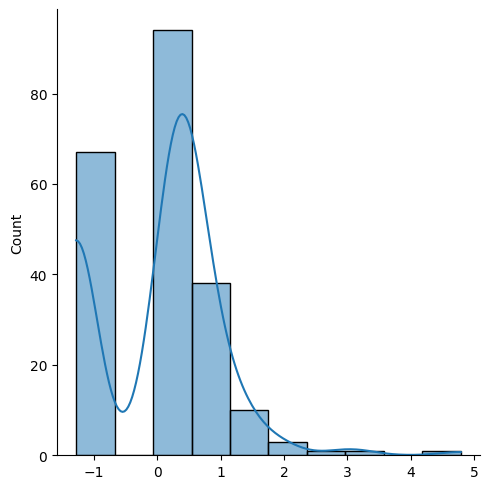

In [79]:
stand_nor_dist(df["salary"])

In [86]:
# 0)What is the probability Density Function of the salary range from
# 700000 to 900000?
def get_pdf_probability(df, startrange, endrange) :
    from matplotlib import pyplot # Importing req Libries
    from scipy.stats import norm 
    import seaborn as sns
    ax=sns.distplot(df, kde=True, kde_kws={'color' : 'blue'}, color='Green')  #Making the curve and giveing colours
    pyplot.axvline(startrange, color="Red")
    pyplot. axvline(endrange, color= "Red") # Making probability stight or veritical line
    # generate a sample
    sample = df
    # calculate parameters
    sample_mean =sample.mean()
    sample_std = sample.std()  # oading dataset and geting mean and mode values
    print('Mean-%.3f, Standard Deviation-%.3f' % (sample_mean, sample_std)) # printing mean and mode
    # define the distribution
    dist = norm(sample_mean, sample_std) # by useing inbulit function  scipy.stats we can calculate norm
    # sample probabilities for a range of outcomes
    values = [value for value in range(startrange, endrange)] #By useing inline for loop to calculate probabilities sumation
    probabilities = [dist.pdf(value) for value in values] # by inbulit function dist.pdf we can take sumation
    prob=sum(probabilities)
    print("The area between range(({},{}):{}".format(startrange, endrange, sum(probabilities))) #The hole value to take sum to print
    return prob

C:\Users\Dell\AppData\Local\Temp\ipykernel_13264\726908815.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(df, kde=True, kde_kws={'color' : 'blue'}, color='Green')  #Making the curve and giveing colours


Mean-198702.326, Standard Deviation-154780.927
The area between range((700000,900000):0.0005973310593974868


np.float64(0.0005973310593974868)

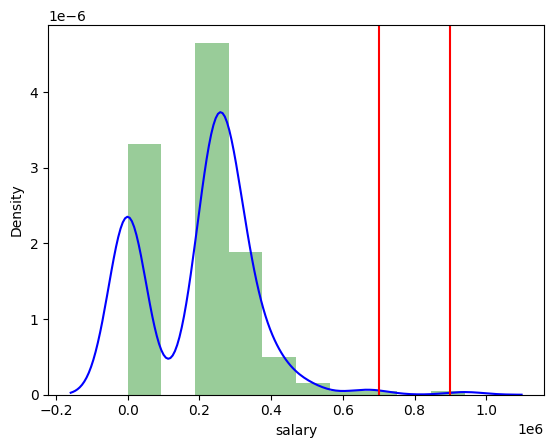

In [87]:
get_pdf_probability(df['salary'],700000 ,900000)

In [89]:
# 11)Test the similarity between the degree_t(Sci&Tech)with respect to
# etest_p and mba_p at significance level of 5%.(Make decision using Hy-
# pothesis Testing)
from scipy.stats import ttest_ind
dataset=dataset.dropna()
etest=dataset[dataset['degree_t']=='Sci&Tech']["etest_p"]
mba=dataset[dataset['degree_t']=='Sci&Tech']["mba_p"]
ttest_ind(etest,mba)  # Accept NulL Hypothest and Reject Alternate hypothsis 5.027

TtestResult(statistic=np.float64(4.286330847883898), pvalue=np.float64(5.027752902669624e-05), df=np.float64(80.0))

In [94]:
# 12)Which parameter is highly correlated with salary?
df[quan].corr()['salary'] #ssc_pis the most highly correlated parameter with salary

sl_no       0.002543
ssc_p       0.538090
hsc_p       0.452569
degree_p    0.408371
etest_p     0.186988
mba_p       0.139823
salary      1.000000
Name: salary, dtype: float64

C:\Users\Dell\AppData\Local\Temp\ipykernel_13264\3462223958.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["ssc_p"])


<Axes: xlabel='ssc_p', ylabel='Density'>

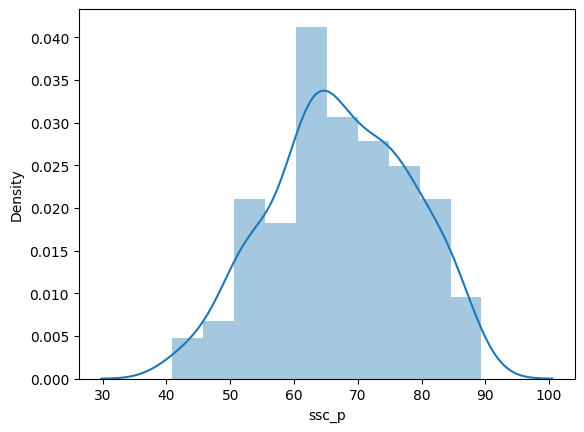

In [96]:
# plot any useful graph and explain it.
import seaborn as sns
sns.distplot(df["ssc_p"])